In [14]:
import json
import pandas as pd

# portfolio data
with open('merged.json', 'r') as file:
    data = json.load(file)

# Wandele das Datenformat um
returns_list = []

for start_date, periods in data.items():
    for period in periods:
        rendite = list(period.values())[0]
        returns_list.append({'Investitionsstartdatum': start_date, 'Periode': list(period.keys())[0], 'Rendite': rendite})

# Erstelle einen DataFrame aus der umgewandelten Liste
df = pd.DataFrame(returns_list)

# Konvertiere die Renditen von Strings zu Floats
df['Rendite'] = df['Rendite'].astype(float)


print(df)


     Investitionsstartdatum   Periode   Rendite
0                2000-03-31  Period-1 -0.054978
1                2000-03-31  Period-2  0.133272
2                2000-03-31  Period-3  0.004588
3                2000-03-31  Period-4 -0.112862
4                2000-03-31  Period-5  0.102976
...                     ...       ...       ...
1831             2022-03-31  Period-2 -0.135591
1832             2022-03-31  Period-3  0.064474
1833             2022-06-30  Period-1  0.003435
1834             2022-06-30  Period-2  0.177062
1835             2022-09-30  Period-1  0.161132

[1836 rows x 3 columns]


In [21]:
from datetime import datetime, timedelta
import yfinance as yf

# get s&p 500 data from yahoo finance
returns_dictionary = {}

for key in data.keys():
    start_date = key
    end_date = (datetime.strptime(start_date, "%Y-%m-%d") + timedelta(days=3*365)).strftime("%Y-%m-%d")

    sp500_ticker = "^GSPC"  # Ticker symbol for the S&P 500

    # Fetch data from Yahoo Finance
    sp500_data = yf.download(sp500_ticker, start=start_date, end=end_date)

    first_row = sp500_data.head(1)
    start_price = first_row['Adj Close'].iloc[0]

    last_row = sp500_data.tail(1)
    end_price = last_row['Adj Close'].iloc[0]

    # calculate return with adjusted closing price+

    returns = ((end_price - start_price) / start_price)
    print(f'Returns from {start_date} to {end_date} is {returns}')
    returns_dictionary[start_date] = returns


print(returns_dictionary)

'''
returns_dictionary = {'2000-03-31': -13.058358388927276, '2000-06-30': -14.340710785582814, '2000-09-30': -6.778160664364134, '2000-12-31': 10.52233958884183, '2001-03-31': 24.144103201811618, '2001-06-30': 21.750274646365046, '2001-09-30': 47.00784056798689, '2001-12-31': 28.779357433877955, '2002-03-31': 14.712083825572353, '2002-06-30': 31.97542689952504, '2002-09-30': 48.81635461837757, '2002-12-31': -0.797892690869791, '2003-03-31': -3.8010788409033847, '2003-06-30': -5.705487489577989, '2003-09-30': 4.860591745101658, '2003-12-31': 1.4263602349759008, '2004-03-31': 4.174178119192986, '2004-06-30': -5.8088795551266506, '2004-09-30': 2.9715225845639064, '2004-12-31': 3.9491041996267344, '2005-03-31': 11.761066890777782, '2005-06-30': 8.842226064681396, '2005-09-30': -6.327259404840572, '2005-12-31': -0.4555508413018652, '2006-03-31': 8.546807352293055, '2006-06-30': 4.853568476143047, '2006-09-30': 8.700393804499525, '2006-12-31': -1.0002768685026273, '2007-03-31': 10.15337388090435, '2007-06-30': 6.171386253149411, '2007-09-30': 9.353989378658465, '2007-12-31': 25.405216893947486, '2008-03-31': 40.44152594633336, '2008-06-30': 53.19999694824219, '2008-09-30': 70.00325804115012, '2008-12-31': 131.44977230660115, '2009-03-31': 158.31526842020634, '2009-06-30': 128.59178234910726, '2009-09-30': 78.01586424498409, '2009-12-31': 86.38329772447402, '2010-03-31': 74.19169640492649, '2010-06-30': 94.09340307945354, '2010-09-30': 89.2683161634065, '2011-03-31': 77.89385867987502, '2011-06-30': 83.19752968083084, '2011-09-30': 121.58349169070213, '2011-12-31': 110.4474273529404, '2012-03-31': 86.10257952497321, '2012-06-30': 98.92274968090312, '2012-09-30': 101.73071465839259, '2012-12-31': 74.29235181559258, '2013-03-31': 81.43990875573178, '2013-06-30': 82.15683861647595, '2013-09-30': 76.13451595607138, '2013-12-31': 75.29161230543467, '2014-03-31': 35.7376340353688, '2014-06-30': 53.50494986861545, '2014-09-30': 67.24010645540632, '2014-12-31': 81.4250466071578, '2015-06-30': 107.48772350603201, '2015-09-30': 131.40835275937533, '2016-03-31': 124.86333807255092, '2016-06-30': 82.0774064605148, '2016-09-30': 71.5210746614716, '2016-12-31': 70.48581585437483, '2017-03-31': 70.47344198792668, '2017-06-30': 80.60749200582252, '2017-09-30': 70.00774957632174, '2017-12-31': 76.93494624814731, '2018-03-31': 91.49613536345738, '2018-06-30': 81.32475643330179, '2018-09-30': 69.0561769932869, '2018-12-31': 97.22759649390372, '2019-03-31': 72.44026529268963, '2019-06-30': 66.78945364051874, '2019-09-30': 66.09445942650893, '2019-12-31': 53.03393906648203, '2020-03-31': 91.2953322260721, '2020-06-30': 59.475077464085544, '2020-09-30': 47.017244763789776, '2020-12-31': 31.62160755022648, '2021-03-31': 24.43837957661905, '2021-06-30': 15.038971604130309, '2021-09-30': 14.779895173819707, '2021-12-31': 3.7266662684890086, '2022-03-31': 9.120580538634314, '2022-06-30': 30.60247472479051, '2022-09-30': 37.87851593618716, '2022-12-31': 29.27377141395344}
'''

[*********************100%%**********************]  1 of 1 completed
Returns from 2000-03-31 to 2003-03-31 is -0.42378783560315525
[*********************100%%**********************]  1 of 1 completed
Returns from 2000-06-30 to 2003-06-30 is -0.3288739261047443
[*********************100%%**********************]  1 of 1 completed
Returns from 2000-09-30 to 2003-09-30 is -0.2991512287180352
[*********************100%%**********************]  1 of 1 completed
Returns from 2000-12-31 to 2003-12-31 is -0.13530278292189488
[*********************100%%**********************]  1 of 1 completed
Returns from 2001-03-31 to 2004-03-30 is -0.020421186097703336
[*********************100%%**********************]  1 of 1 completed
Returns from 2001-06-30 to 2004-06-29 is -0.08358399440935485
[*********************100%%**********************]  1 of 1 completed
Returns from 2001-09-30 to 2004-09-29 is 0.06885562216892213
[*********************100%%**********************]  1 of 1 completed
Returns from 200

"\nreturns_dictionary = {'2000-03-31': -13.058358388927276, '2000-06-30': -14.340710785582814, '2000-09-30': -6.778160664364134, '2000-12-31': 10.52233958884183, '2001-03-31': 24.144103201811618, '2001-06-30': 21.750274646365046, '2001-09-30': 47.00784056798689, '2001-12-31': 28.779357433877955, '2002-03-31': 14.712083825572353, '2002-06-30': 31.97542689952504, '2002-09-30': 48.81635461837757, '2002-12-31': -0.797892690869791, '2003-03-31': -3.8010788409033847, '2003-06-30': -5.705487489577989, '2003-09-30': 4.860591745101658, '2003-12-31': 1.4263602349759008, '2004-03-31': 4.174178119192986, '2004-06-30': -5.8088795551266506, '2004-09-30': 2.9715225845639064, '2004-12-31': 3.9491041996267344, '2005-03-31': 11.761066890777782, '2005-06-30': 8.842226064681396, '2005-09-30': -6.327259404840572, '2005-12-31': -0.4555508413018652, '2006-03-31': 8.546807352293055, '2006-06-30': 4.853568476143047, '2006-09-30': 8.700393804499525, '2006-12-31': -1.0002768685026273, '2007-03-31': 10.1533738809

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Portfolio Data
df['Investitionsstartdatum'] = pd.to_datetime(df['Investitionsstartdatum'])
df['Periode'] = df['Periode'].apply(lambda x: int(x.split('-')[-1]))
df.set_index('Investitionsstartdatum', inplace=True)

# Zeitreihen erstellen
sp500_time_series = pd.Series(returns_dictionary).sum()
portfolio_time_series = df.groupby('Investitionsstartdatum')['Rendite'].sum()

print(sp500_time_series)
print(portfolio_time_series)


KeyError: 'Investitionsstartdatum'

In [17]:
three_year_returns = []

for start_date, group in df.groupby('Investitionsstartdatum'):
    three_year_return = group.loc[group['Periode'] == 'Period-12', 'Rendite'].values

    if len(three_year_return) > 0:
        three_year_returns.append({
            'Investitionsstartdatum': start_date,
            'ThreeYearReturn': three_year_return[0]
        })

df_three_year_returns = pd.DataFrame(three_year_returns)
print(df_three_year_returns)



   Investitionsstartdatum  ThreeYearReturn
0              2000-03-31        -0.109294
1              2000-06-30         0.196790
2              2000-09-30         0.066354
3              2000-12-31         0.141803
4              2001-03-31         0.084108
..                    ...              ...
72             2018-12-31         0.026703
73             2019-03-31        -0.005309
74             2019-06-30        -0.128025
75             2019-09-30        -0.090476
76             2019-12-31         0.096420

[77 rows x 2 columns]


In [22]:
three_year_returns_dict = df_three_year_returns.set_index('Investitionsstartdatum').to_dict()['ThreeYearReturn']
print(three_year_returns_dict)

{'2000-03-31': -0.10929405408268093, '2000-06-30': 0.19679025135655576, '2000-09-30': 0.06635392710902327, '2000-12-31': 0.1418025789847907, '2001-03-31': 0.08410815337752568, '2001-06-30': -0.027576044229187403, '2001-09-30': -0.0417550639540152, '2001-12-31': 0.07229289472276049, '2002-03-31': -0.005018890850785972, '2002-06-30': 0.032211293579980094, '2002-09-30': 0.10940854510035528, '2002-12-31': 0.054437118198208685, '2003-03-31': -0.004463383527487359, '2003-06-30': -0.05231366799069765, '2003-09-30': -0.00679162327043349, '2003-12-31': 0.04659483631922755, '2004-03-31': -0.02380670906469586, '2004-06-30': 0.06167884965758574, '2004-09-30': -0.08924169406166915, '2004-12-31': -0.1662602799232217, '2005-03-31': -0.023432810249060465, '2005-06-30': 0.11013924255558423, '2005-09-30': -0.43317397963464016, '2005-12-31': -0.47198107864531474, '2006-03-31': -0.2205566586263342, '2006-06-30': 0.3845898852013863, '2006-09-30': 0.3259364102447259, '2006-12-31': -0.0007292830820179334, '2

In [23]:
print(returns_dictionary)

{'2000-03-31': -0.42378783560315525, '2000-06-30': -0.3288739261047443, '2000-09-30': -0.2991512287180352, '2000-12-31': -0.13530278292189488, '2001-03-31': -0.020421186097703336, '2001-06-30': -0.08358399440935485, '2001-09-30': 0.06885562216892213, '2001-12-31': 0.05693853879465663, '2002-03-31': 0.016414556533456214, '2002-06-30': 0.24045828318219836, '2002-09-30': 0.492603732361658, '2002-12-31': 0.42576894535549187, '2003-03-31': 0.5361008581895071, '2003-06-30': 0.2786044125192406, '2003-09-30': 0.3442975634472225, '2003-12-31': 0.27554139935792105, '2004-03-31': 0.26162974457159355, '2004-06-30': 0.3177571093461517, '2004-09-30': 0.3697985431249664, '2004-12-31': 0.21995671052791943, '2005-03-31': 0.11403620967527635, '2005-06-30': 0.07306963816842779, '2005-09-30': -0.012646412644346367, '2005-12-31': -0.31476990112574454, '2006-03-31': -0.36986724109893165, '2006-06-30': -0.276570571769985, '2006-09-30': -0.20155933708368645, '2006-12-31': -0.204997903020538, '2007-03-31': -0.

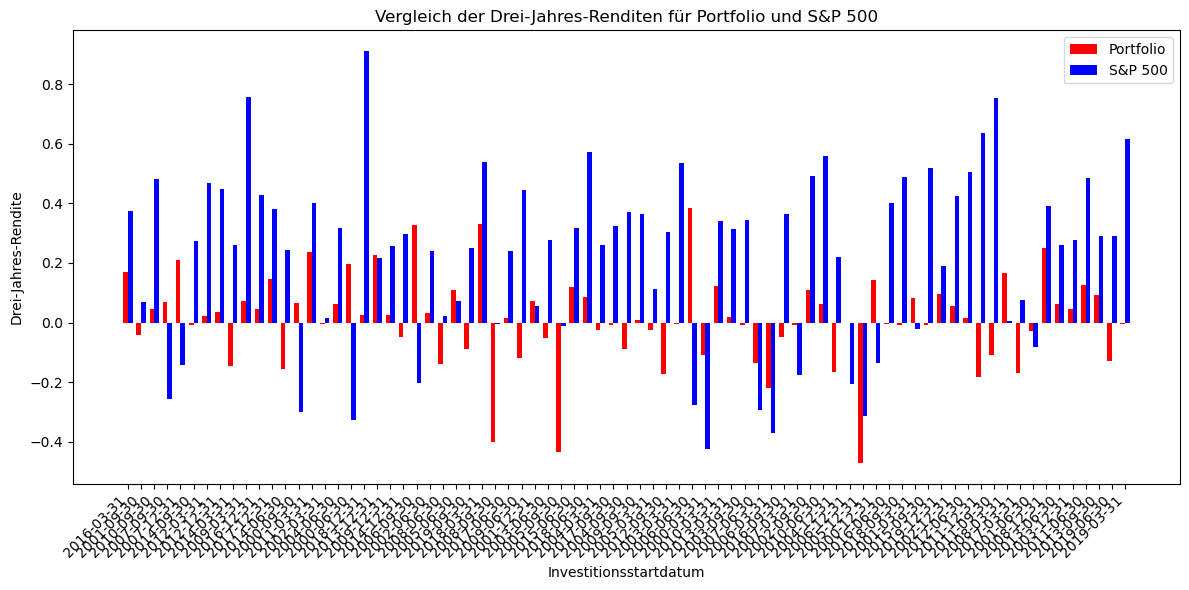

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Sicherstellen, dass nur gemeinsame Investitionsstartdaten verwendet werden
common_dates = set(three_year_returns_dict.keys()) & set(returns_dictionary.keys())

# Daten vorbereiten
portfolio_returns = [three_year_returns_dict[date] for date in common_dates]
sp500_returns = [returns_dictionary[date] for date in common_dates]
dates = list(common_dates)

# Balkendiagramm erstellen
bar_width = 0.35
index = np.arange(len(dates))

fig, ax = plt.subplots(figsize=(12, 6))

bar1 = ax.bar(index, portfolio_returns, bar_width, label='Portfolio', color='red')
bar2 = ax.bar(index + bar_width, sp500_returns, bar_width, label='S&P 500', color='blue')

# Achsenbeschriftungen und Titel hinzufügen
ax.set_xlabel('Investitionsstartdatum')
ax.set_ylabel('Drei-Jahres-Rendite')
ax.set_title('Vergleich der Drei-Jahres-Renditen für Portfolio und S&P 500')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(dates, rotation=45, ha='right')
ax.legend()

# Diagramm anzeigen
plt.tight_layout()
plt.show()




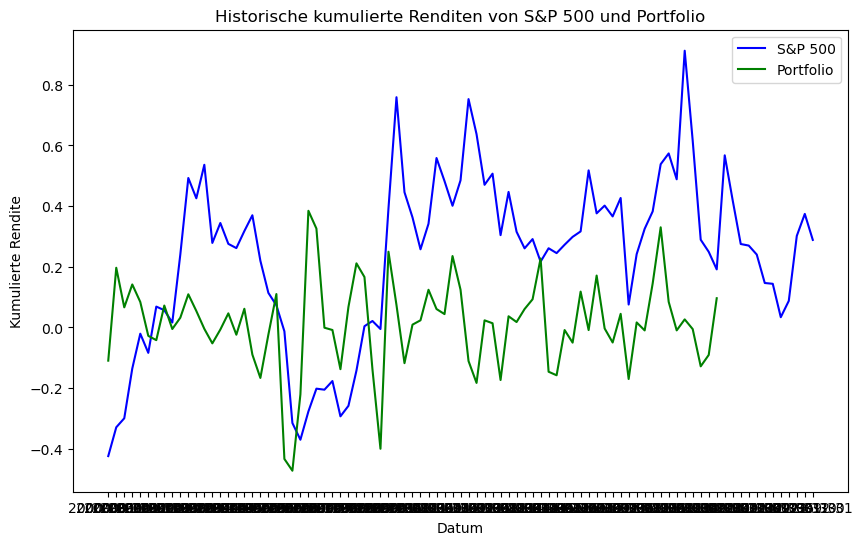

In [30]:
# Konvertiere die Renditen-Dictionaries in Pandas Series für einfache Handhabung
sp500_series = pd.Series(returns_dictionary)
portfolio_series = pd.Series(three_year_returns_dict)

# Wandele Index und Werte in NumPy-Arrays um
sp500_dates = sp500_series.index.values
sp500_values = sp500_series.values

portfolio_dates = portfolio_series.index.values
portfolio_values = portfolio_series.values

# Plot erstellen
plt.figure(figsize=(10, 6))

# Linie für S&P 500 hinzufügen
plt.plot(sp500_dates, sp500_values, label='S&P 500', linestyle='-', color='blue')

# Linie für Portfolio hinzufügen
plt.plot(portfolio_dates, portfolio_values, label='Portfolio', linestyle='-', color='green')

# Achsentitel und Legende hinzufügen
plt.title('Historische kumulierte Renditen von S&P 500 und Portfolio')
plt.xlabel('Datum')
plt.ylabel('Kumulierte Rendite')
plt.legend()

# Diagramm anzeigen
plt.show()


In [ ]:
# Konvertiere die Renditen-Dictionaries in Pandas Series für einfache Handhabung
sp500_series = pd.Series(returns_dictionary)
portfolio_series = pd.Series(three_year_returns_dict)

# Wandele Index und Werte in NumPy-Arrays um
sp500_dates = sp500_series.index.values
sp500_values = sp500_series.values

portfolio_dates = portfolio_series.index.values
portfolio_values = portfolio_series.values

# Plot erstellen
plt.figure(figsize=(10, 6))

# Linie für S&P 500 hinzufügen
plt.plot(sp500_dates, sp500_values, label='S&P 500', linestyle='-', color='blue')

# Linie für Portfolio hinzufügen
plt.plot(portfolio_dates, portfolio_values, label='Portfolio', linestyle='-', color='green')

# Achsentitel und Legende hinzufügen
plt.title('Historische Renditen von S&P 500 und Portfolio')
plt.xlabel('Datum')
plt.ylabel('Kumulierte Rendite')
plt.legend()

# Diagramm anzeigen
plt.show()


In [ ]:
# kumuliert darstellen wenn dann für's selbe portfolio , sonst wird das glaube ich verfälscht...


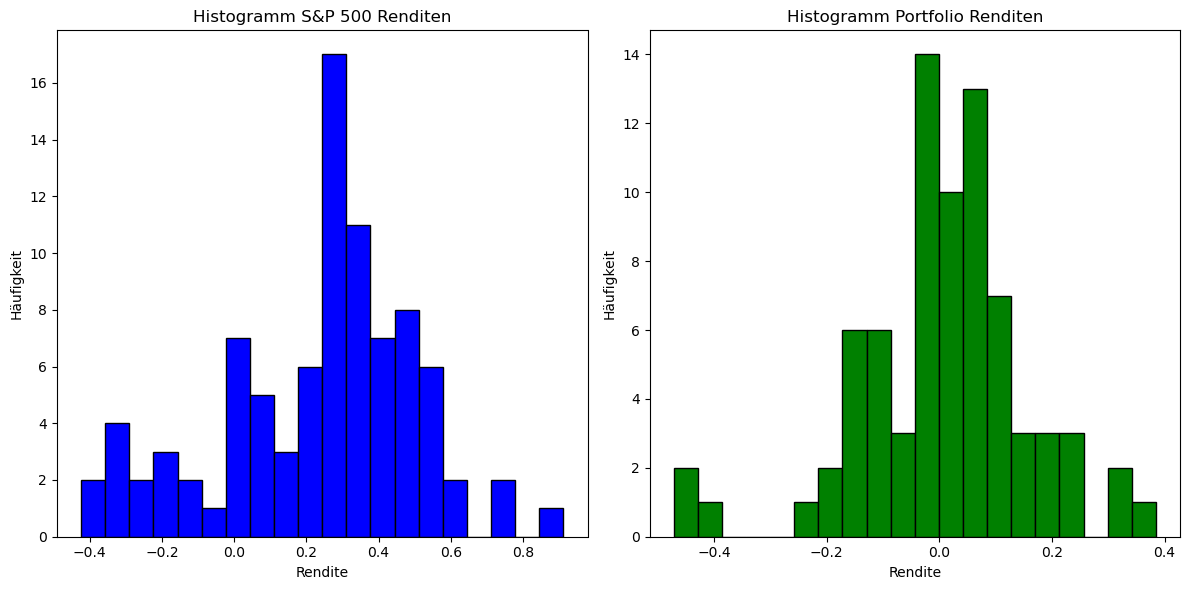

Standardabweichung S&P 500: 0.27624642779422615
Standardabweichung Portfolio: 0.15204049357848123


In [32]:
# standardabweichung:

import pandas as pd
import matplotlib.pyplot as plt

# Konvertiere die Renditen-Dictionaries in Pandas Series für einfache Handhabung
sp500_series = pd.Series(returns_dictionary)
portfolio_series = pd.Series(three_year_returns_dict)

# Plot erstellen
plt.figure(figsize=(12, 6))

# Histogramm für S&P 500 Renditen
plt.subplot(1, 2, 1)
plt.hist(sp500_series, bins=20, color='blue', edgecolor='black')
plt.title('Histogramm S&P 500 Renditen')
plt.xlabel('Rendite')
plt.ylabel('Häufigkeit')

# Histogramm für Portfolio Renditen
plt.subplot(1, 2, 2)
plt.hist(portfolio_series, bins=20, color='green', edgecolor='black')
plt.title('Histogramm Portfolio Renditen')
plt.xlabel('Rendite')
plt.ylabel('Häufigkeit')

# Diagramm anzeigen
plt.tight_layout()
plt.show()

# Berechne Standardabweichung
std_dev_sp500 = sp500_series.std()
std_dev_portfolio = portfolio_series.std()

print(f'Standardabweichung S&P 500: {std_dev_sp500}')
print(f'Standardabweichung Portfolio: {std_dev_portfolio}')